# 1. Data Preprocessing

## 1.1.  Reading the data from World Bank's API

In [1]:

!pip install pandas_datareader

In [2]:
from pandas_datareader import wb

Go to: <url>https://databank.worldbank.org/source/world-development-indicators</url>

In [3]:
code = "EN.CO2.BLDG.ZS"

CO$_{2}$ emissions from residential buildings and from commercial and from public services (% of total fuel combustion).

Countries: 

In [4]:
regions = ["BRA", "IND", "CHN", "ZAF", "USA", "GBR", "WLD", "EUU"]

Another interesting indicator: "EG.ELC.ACCS.ZS" electricity access

In [5]:
df_indicator = wb.download(
    country=regions,
    indicator=code,
    start=1971,
    end=2014
)

/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, WLD
  warnings.warn(


In [6]:
df_indicator

EN.CO2.BLDG.ZS
country      year                
Brazil       2014        4.289736
             2013        4.508896
             2012        4.746116
             2011        5.159270
             2010        5.346396
...                           ...
South Africa 1975        6.572400
             1974        6.815974
             1973        6.949115
             1972        7.742371
             1971        7.925393

[352 rows x 1 columns]

The data contains CO$_2$ emission from buildings (including residential, commercial, and public services). This is a time-series dataset, because each date has a value. Here every year has a single value.

In [7]:
df_indicator.to_excel("indicator_world_bank.xlsx")

These are small datasets and ideally for ML we would like to have hundreds of datapoints

**Allowing all rows to be seen**

In [8]:
import pandas as pd

In [9]:
pd.set_option("display.max_rows", None)

In [10]:
df_indicator.head(9)

EN.CO2.BLDG.ZS
country year                
Brazil  2014        4.289736
        2013        4.508896
        2012        4.746116
        2011        5.159270
        2010        5.346396
        2009        6.042296
        2008        5.728822
        2007        6.021721
        2006        6.104512

**Checking for NaN values**

In [11]:
df_indicator.isnull().sum()

EN.CO2.BLDG.ZS    0
dtype: int64

## 1.2. Converting the elements of column Year, from strings into integers

In [12]:
df_indicator_backup1 = df_indicator.copy() # for later use

In [13]:
df_indicator = df_indicator.reset_index()

In [14]:
df_indicator.head()

,country,year,EN.CO2.BLDG.ZS
0,Brazil,2014,4.289736
1,Brazil,2013,4.508896
2,Brazil,2012,4.746116
3,Brazil,2011,5.159270
4,Brazil,2010,5.346396


In [15]:
type(df_indicator["year"][0])

str

In [16]:
df_indicator["year"] = df_indicator["year"].astype(int)

In [17]:
type(df_indicator["year"][0])

numpy.int64

In [18]:
df_indicator.set_index("year", inplace=True)
df_indicator.head()

,country,EN.CO2.BLDG.ZS
year,,
2014,Brazil,4.289736
2013,Brazil,4.508896
2012,Brazil,4.746116
2011,Brazil,5.159270
2010,Brazil,5.346396


## 1.3. Sorting the index (so that 1971 is on top)

In [19]:
df_indicator = df_indicator.sort_index()

In [20]:
df_indicator.head()

,country,EN.CO2.BLDG.ZS
year,,
1971,United Kingdom,17.230274
1971,World,18.615556
1971,United States,19.061400
1971,India,15.087564
1971,European Union,21.950546


In [21]:
df_indicator.columns = ["country", "Indicator"]

In [22]:
df_indicator.head()

,country,Indicator
year,,
1971,United Kingdom,17.230274
1971,World,18.615556
1971,United States,19.061400
1971,India,15.087564
1971,European Union,21.950546


## 1.4. Columns are countries

In [23]:
df_indicator.head(10)

,country,Indicator
year,,
1971,United Kingdom,17.230274
1971,World,18.615556
1971,United States,19.061400
1971,India,15.087564
1971,European Union,21.950546
1971,China,21.596575
1971,Brazil,7.044025
1971,South Africa,7.925393
1972,United States,18.390586


In [24]:
df_indicator = pd.pivot_table(df_indicator, values="Indicator",
                             columns="country", index="year")

In [25]:
df_indicator

country,Brazil,China,European Union,India,South Africa,United Kingdom,United States,World
year,,,,,,,,
1971,7.044025,21.596575,21.950546,15.087564,7.925393,17.230274,19.061400,18.615556
1972,7.056473,21.329853,22.129084,14.035274,7.742371,18.141505,18.390586,18.432397
1973,6.568496,20.831115,21.894976,14.183907,6.949115,17.421817,17.048219,17.565715
1974,6.133508,20.318703,20.240601,12.503688,6.815974,18.435426,16.687413,16.947899
1975,5.927298,20.465564,20.728440,12.209276,6.572400,17.964301,17.031575,17.173455
1976,5.767214,19.931858,20.164812,12.336263,6.429296,17.870337,17.264680,17.137039
1977,5.670138,19.983016,19.668188,12.602554,5.527939,18.214177,16.128702,16.512286
1978,5.635035,18.922859,19.879768,13.587028,6.764253,17.977528,16.105992,16.480944
1979,5.783516,19.026029,19.616910,13.698245,6.058166,18.140961,14.846802,15.885459


In [26]:
regions # we want these codes to be the columns of df_indicator. This will facilitate for-loops later on.

['BRA', 'IND', 'CHN', 'ZAF', 'USA', 'GBR', 'WLD', 'EUU']

In [27]:
df_indicator.columns

Index(['Brazil', 'China', 'European Union', 'India', 'South Africa',
       'United Kingdom', 'United States', 'World'],
      dtype='object', name='country')

In [28]:
df_indicator.columns = [regions[0], regions[2], regions[7], regions[1], regions[3], regions[5], regions[4], regions[6]]

In [29]:
df_indicator

,BRA,CHN,EUU,IND,ZAF,GBR,USA,WLD
year,,,,,,,,
1971,7.044025,21.596575,21.950546,15.087564,7.925393,17.230274,19.061400,18.615556
1972,7.056473,21.329853,22.129084,14.035274,7.742371,18.141505,18.390586,18.432397
1973,6.568496,20.831115,21.894976,14.183907,6.949115,17.421817,17.048219,17.565715
1974,6.133508,20.318703,20.240601,12.503688,6.815974,18.435426,16.687413,16.947899
1975,5.927298,20.465564,20.728440,12.209276,6.572400,17.964301,17.031575,17.173455
1976,5.767214,19.931858,20.164812,12.336263,6.429296,17.870337,17.264680,17.137039
1977,5.670138,19.983016,19.668188,12.602554,5.527939,18.214177,16.128702,16.512286
1978,5.635035,18.922859,19.879768,13.587028,6.764253,17.977528,16.105992,16.480944
1979,5.783516,19.026029,19.616910,13.698245,6.058166,18.140961,14.846802,15.885459


In [30]:
df_indicator.to_excel("dfinc.xlsx")

# 2. Polynomial Feature

## 2.1. Adding polynomial features

In [31]:
degree = 3 # arbitrarily we select polynomial degree = 3

In [32]:
from sklearn.preprocessing import PolynomialFeatures

We import the PolynomialFeatures class from sckit-learn package

In [33]:
poly = PolynomialFeatures(degree=degree, include_bias=False)
# this is the polynomial features transformer
poly

PolynomialFeatures(degree=3, include_bias=False)

To be able to find non linear pattern in our data

In [34]:
t = df_indicator.index.values.reshape(-1,1) # the feature

In [35]:
t.shape

(44, 1)

In [36]:
t

array([[1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]])

In [37]:
X = poly.fit_transform(t)
X

array([[1.97100000e+03, 3.88484100e+06, 7.65702161e+09],
       [1.97200000e+03, 3.88878400e+06, 7.66868205e+09],
       [1.97300000e+03, 3.89272900e+06, 7.68035432e+09],
       [1.97400000e+03, 3.89667600e+06, 7.69203842e+09],
       [1.97500000e+03, 3.90062500e+06, 7.70373438e+09],
       [1.97600000e+03, 3.90457600e+06, 7.71544218e+09],
       [1.97700000e+03, 3.90852900e+06, 7.72716183e+09],
       [1.97800000e+03, 3.91248400e+06, 7.73889335e+09],
       [1.97900000e+03, 3.91644100e+06, 7.75063674e+09],
       [1.98000000e+03, 3.92040000e+06, 7.76239200e+09],
       [1.98100000e+03, 3.92436100e+06, 7.77415914e+09],
       [1.98200000e+03, 3.92832400e+06, 7.78593817e+09],
       [1.98300000e+03, 3.93228900e+06, 7.79772909e+09],
       [1.98400000e+03, 3.93625600e+06, 7.80953190e+09],
       [1.98500000e+03, 3.94022500e+06, 7.82134662e+09],
       [1.98600000e+03, 3.94419600e+06, 7.83317326e+09],
       [1.98700000e+03, 3.94816900e+06, 7.84501180e+09],
       [1.98800000e+03, 3.95214

In [38]:
X.shape

(44, 3)

In [39]:
import numpy as np
t_future = np.arange(2015, 2051).reshape(-1,1)
t_future

array([[2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049],
       [2050]])

In [40]:
X_future = poly.fit_transform(t_future)
X_future

array([[2.01500000e+03, 4.06022500e+06, 8.18135338e+09],
       [2.01600000e+03, 4.06425600e+06, 8.19354010e+09],
       [2.01700000e+03, 4.06828900e+06, 8.20573891e+09],
       [2.01800000e+03, 4.07232400e+06, 8.21794983e+09],
       [2.01900000e+03, 4.07636100e+06, 8.23017286e+09],
       [2.02000000e+03, 4.08040000e+06, 8.24240800e+09],
       [2.02100000e+03, 4.08444100e+06, 8.25465526e+09],
       [2.02200000e+03, 4.08848400e+06, 8.26691465e+09],
       [2.02300000e+03, 4.09252900e+06, 8.27918617e+09],
       [2.02400000e+03, 4.09657600e+06, 8.29146982e+09],
       [2.02500000e+03, 4.10062500e+06, 8.30376562e+09],
       [2.02600000e+03, 4.10467600e+06, 8.31607358e+09],
       [2.02700000e+03, 4.10872900e+06, 8.32839368e+09],
       [2.02800000e+03, 4.11278400e+06, 8.34072595e+09],
       [2.02900000e+03, 4.11684100e+06, 8.35307039e+09],
       [2.03000000e+03, 4.12090000e+06, 8.36542700e+09],
       [2.03100000e+03, 4.12496100e+06, 8.37779579e+09],
       [2.03200000e+03, 4.12902

In [41]:
## example
polytest = PolynomialFeatures(degree=degree, include_bias=True)
t_test = df_indicator.index.values.reshape(-1,1) # the feature
X_test = polytest.fit_transform(t_test)
X_test
##

array([[1.00000000e+00, 1.97100000e+03, 3.88484100e+06, 7.65702161e+09],
       [1.00000000e+00, 1.97200000e+03, 3.88878400e+06, 7.66868205e+09],
       [1.00000000e+00, 1.97300000e+03, 3.89272900e+06, 7.68035432e+09],
       [1.00000000e+00, 1.97400000e+03, 3.89667600e+06, 7.69203842e+09],
       [1.00000000e+00, 1.97500000e+03, 3.90062500e+06, 7.70373438e+09],
       [1.00000000e+00, 1.97600000e+03, 3.90457600e+06, 7.71544218e+09],
       [1.00000000e+00, 1.97700000e+03, 3.90852900e+06, 7.72716183e+09],
       [1.00000000e+00, 1.97800000e+03, 3.91248400e+06, 7.73889335e+09],
       [1.00000000e+00, 1.97900000e+03, 3.91644100e+06, 7.75063674e+09],
       [1.00000000e+00, 1.98000000e+03, 3.92040000e+06, 7.76239200e+09],
       [1.00000000e+00, 1.98100000e+03, 3.92436100e+06, 7.77415914e+09],
       [1.00000000e+00, 1.98200000e+03, 3.92832400e+06, 7.78593817e+09],
       [1.00000000e+00, 1.98300000e+03, 3.93228900e+06, 7.79772909e+09],
       [1.00000000e+00, 1.98400000e+03, 3.93625600e

## 2.2 Define the targets & splitting into training/test sets

Target variables are the columns of df_indicator

In [42]:
df_indicator

,BRA,CHN,EUU,IND,ZAF,GBR,USA,WLD
year,,,,,,,,
1971,7.044025,21.596575,21.950546,15.087564,7.925393,17.230274,19.061400,18.615556
1972,7.056473,21.329853,22.129084,14.035274,7.742371,18.141505,18.390586,18.432397
1973,6.568496,20.831115,21.894976,14.183907,6.949115,17.421817,17.048219,17.565715
1974,6.133508,20.318703,20.240601,12.503688,6.815974,18.435426,16.687413,16.947899
1975,5.927298,20.465564,20.728440,12.209276,6.572400,17.964301,17.031575,17.173455
1976,5.767214,19.931858,20.164812,12.336263,6.429296,17.870337,17.264680,17.137039
1977,5.670138,19.983016,19.668188,12.602554,5.527939,18.214177,16.128702,16.512286
1978,5.635035,18.922859,19.879768,13.587028,6.764253,17.977528,16.105992,16.480944
1979,5.783516,19.026029,19.616910,13.698245,6.058166,18.140961,14.846802,15.885459


In [43]:
len(X)

44

In [44]:
train_size = int(0.8 * len(X))

In [45]:
train_size

35

In [46]:
X_train = X[: train_size,:]
X_train

array([[1.97100000e+03, 3.88484100e+06, 7.65702161e+09],
       [1.97200000e+03, 3.88878400e+06, 7.66868205e+09],
       [1.97300000e+03, 3.89272900e+06, 7.68035432e+09],
       [1.97400000e+03, 3.89667600e+06, 7.69203842e+09],
       [1.97500000e+03, 3.90062500e+06, 7.70373438e+09],
       [1.97600000e+03, 3.90457600e+06, 7.71544218e+09],
       [1.97700000e+03, 3.90852900e+06, 7.72716183e+09],
       [1.97800000e+03, 3.91248400e+06, 7.73889335e+09],
       [1.97900000e+03, 3.91644100e+06, 7.75063674e+09],
       [1.98000000e+03, 3.92040000e+06, 7.76239200e+09],
       [1.98100000e+03, 3.92436100e+06, 7.77415914e+09],
       [1.98200000e+03, 3.92832400e+06, 7.78593817e+09],
       [1.98300000e+03, 3.93228900e+06, 7.79772909e+09],
       [1.98400000e+03, 3.93625600e+06, 7.80953190e+09],
       [1.98500000e+03, 3.94022500e+06, 7.82134662e+09],
       [1.98600000e+03, 3.94419600e+06, 7.83317326e+09],
       [1.98700000e+03, 3.94816900e+06, 7.84501180e+09],
       [1.98800000e+03, 3.95214

In [47]:
X_test = X[train_size:,:] # rows 25 ... 31
X_test

array([[2.00600000e+03, 4.02403600e+06, 8.07221622e+09],
       [2.00700000e+03, 4.02804900e+06, 8.08429434e+09],
       [2.00800000e+03, 4.03206400e+06, 8.09638451e+09],
       [2.00900000e+03, 4.03608100e+06, 8.10848673e+09],
       [2.01000000e+03, 4.04010000e+06, 8.12060100e+09],
       [2.01100000e+03, 4.04412100e+06, 8.13272733e+09],
       [2.01200000e+03, 4.04814400e+06, 8.14486573e+09],
       [2.01300000e+03, 4.05216900e+06, 8.15701620e+09],
       [2.01400000e+03, 4.05619600e+06, 8.16917874e+09]])

In [48]:
X_train.shape

(35, 3)

In [49]:
X_test.shape

(9, 3)

In [50]:
df_indicator.index

Int64Index([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='year')

In [51]:
df_indicator.index[:train_size]

Int64Index([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005],
           dtype='int64', name='year')

In [52]:
y_train_indicator = pd.DataFrame(index=df_indicator.index[:train_size]) 
y_train_indicator

""
year
1971
1972
1973
1974
1975
1976
1977
1978
1979


In [53]:
regions

['BRA', 'IND', 'CHN', 'ZAF', 'USA', 'GBR', 'WLD', 'EUU']

In [54]:
df_indicator.head()

,BRA,CHN,EUU,IND,ZAF,GBR,USA,WLD
year,,,,,,,,
1971,7.044025,21.596575,21.950546,15.087564,7.925393,17.230274,19.061400,18.615556
1972,7.056473,21.329853,22.129084,14.035274,7.742371,18.141505,18.390586,18.432397
1973,6.568496,20.831115,21.894976,14.183907,6.949115,17.421817,17.048219,17.565715
1974,6.133508,20.318703,20.240601,12.503688,6.815974,18.435426,16.687413,16.947899
1975,5.927298,20.465564,20.728440,12.209276,6.572400,17.964301,17.031575,17.173455


In [55]:
df_indicator.loc[1971:1990, "BRA"]

year
1971    7.044025
1972    7.056473
1973    6.568496
1974    6.133508
1975    5.927298
1976    5.767214
1977    5.670138
1978    5.635035
1979    5.783516
1980    6.153479
1981    6.784000
1982    7.438704
1983    8.026440
1984    7.689197
1985    7.913945
1986    7.491558
1987    7.800390
1988    8.511921
1989    8.538303
1990    8.938942
Name: BRA, dtype: float64

In [56]:
df_indicator.loc[:train_size, "BRA"]

Series([], Name: BRA, dtype: float64)

In [57]:
train_size

35

In [58]:
1971 + train_size

2006

In [59]:
df_indicator.index[0] + train_size

2006

In [60]:
df_indicator.loc[df_indicator.index[0] + train_size, "BRA"] # returns the value at 1971 + 35 = 2006

6.1045123077413

In [61]:
df_indicator.loc[:(df_indicator.index[0] + train_size), "BRA"] # notice the colon

year
1971    7.044025
1972    7.056473
1973    6.568496
1974    6.133508
1975    5.927298
1976    5.767214
1977    5.670138
1978    5.635035
1979    5.783516
1980    6.153479
1981    6.784000
1982    7.438704
1983    8.026440
1984    7.689197
1985    7.913945
1986    7.491558
1987    7.800390
1988    8.511921
1989    8.538303
1990    8.938942
1991    8.735680
1992    8.814062
1993    8.748152
1994    8.940114
1995    8.629018
1996    8.034153
1997    7.635852
1998    7.568926
1999    7.695609
2000    7.320995
2001    7.230568
2002    7.184062
2003    6.573187
2004    6.369242
2005    6.177134
2006    6.104512
Name: BRA, dtype: float64

In [62]:
for c in regions:
    y_train_indicator[c] = df_indicator.loc[:(df_indicator.index[0] + train_size), c]

In [63]:
y_train_indicator

,BRA,IND,CHN,ZAF,USA,GBR,WLD,EUU
year,,,,,,,,
1971,7.044025,15.087564,21.596575,7.925393,19.061400,17.230274,18.615556,21.950546
1972,7.056473,14.035274,21.329853,7.742371,18.390586,18.141505,18.432397,22.129084
1973,6.568496,14.183907,20.831115,6.949115,17.048219,17.421817,17.565715,21.894976
1974,6.133508,12.503688,20.318703,6.815974,16.687413,18.435426,16.947899,20.240601
1975,5.927298,12.209276,20.465564,6.572400,17.031575,17.964301,17.173455,20.728440
1976,5.767214,12.336263,19.931858,6.429296,17.264680,17.870337,17.137039,20.164812
1977,5.670138,12.602554,19.983016,5.527939,16.128702,18.214177,16.512286,19.668188
1978,5.635035,13.587028,18.922859,6.764253,16.105992,17.977528,16.480944,19.879768
1979,5.783516,13.698245,19.026029,6.058166,14.846802,18.140961,15.885459,19.616910


In [64]:
y_test_indicator = pd.DataFrame(index=df_indicator.index[train_size:])
y_test_indicator

""
year
2006
2007
2008
2009
2010
2011
2012
2013
2014


In [65]:
for c in regions:
    y_test_indicator[c] = df_indicator.loc[(df_indicator.index[0] + train_size):, c]

In [66]:
y_test_indicator

,BRA,IND,CHN,ZAF,USA,GBR,WLD,EUU
year,,,,,,,,
2006,6.104512,7.464892,6.495481,6.463258,9.236012,17.852515,9.862386,16.485827
2007,6.021721,6.926106,6.156229,7.648682,9.652542,17.425913,9.471573,14.444750
2008,5.728822,6.596951,5.798459,7.653411,10.089048,19.615369,9.636771,16.024392
2009,6.042296,6.272677,5.573417,7.821341,10.765703,20.262562,9.615836,16.880886
2010,5.346396,6.208523,5.401937,3.412499,10.190292,21.763386,9.204829,17.275371
2011,5.159270,6.173230,5.205434,4.123685,10.230125,19.065864,8.805714,15.673458
2012,4.746116,5.701490,5.302652,5.553239,9.712099,20.131135,8.632350,16.344142
2013,4.508896,5.704307,5.306225,5.591515,10.679440,20.827589,8.804332,17.060117
2014,4.289736,5.490006,5.358338,5.469054,11.011918,19.061397,8.595320,15.459913


In [67]:
y_train_indicator.shape

(35, 8)

In [68]:
y_test_indicator.shape

(9, 8)

## 2.3 Scaling the features and the target

We do not need to scale them when doing linear regression or ARIMA, so this section doesn't affect LR or ARIMA.

In [69]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [70]:
X_test.shape

(9, 3)

### scaling x_train

In [71]:
x_scaler = StandardScaler().fit(X_train)
x_scaler

StandardScaler()

In [72]:
X_train_scaled = x_scaler.transform(X_train)

In [73]:
print(X_train_scaled)
print(X_train_scaled.shape)

[[-1.68325082 -1.67858962 -1.67393496]
 [-1.58423607 -1.58039692 -1.5765595 ]
 [-1.48522131 -1.48215442 -1.47908522]
 [-1.38620656 -1.38386211 -1.38151209]
 [-1.28719181 -1.28551999 -1.28384006]
 [-1.18817705 -1.18712806 -1.18606906]
 [-1.0891623  -1.08868634 -1.08819906]
 [-0.99014754 -0.9901948  -0.99022999]
 [-0.89113279 -0.89165346 -0.89216182]
 [-0.79211803 -0.79306231 -0.79399449]
 [-0.69310328 -0.69442136 -0.69572795]
 [-0.59408853 -0.5957306  -0.59736215]
 [-0.49507377 -0.49699003 -0.49889704]
 [-0.39605902 -0.39819966 -0.40033257]
 [-0.29704426 -0.29935948 -0.30166869]
 [-0.19802951 -0.2004695  -0.20290536]
 [-0.09901475 -0.10152971 -0.10404251]
 [ 0.         -0.00254011 -0.0050801 ]
 [ 0.09901475  0.09649929  0.09398191]
 [ 0.19802951  0.1955885   0.19314359]
 [ 0.29704426  0.29472752  0.29240498]
 [ 0.39605902  0.39391634  0.39176612]
 [ 0.49507377  0.49315496  0.49122708]
 [ 0.59408853  0.5924434   0.5907879 ]
 [ 0.69310328  0.69178163  0.69044862]
 [ 0.79211803  0.79116968

### scaling X_test

Below we see that the X_test scaled uses the x_scaler that was created on X_train.

Since the model is fitted to X_train, the scaler also needs to be fitted to X_train.

In [74]:
X_test_scaled = x_scaler.transform(X_test)
print(X_test_scaled)
print(X_test_scaled.shape)

[[1.78226558 1.78778946 1.79332505]
 [1.88128033 1.88772538 1.89418862]
 [1.98029509 1.98771109 1.99515274]
 [2.07930984 2.08774662 2.09621747]
 [2.17832459 2.18783195 2.19738287]
 [2.27733935 2.28796709 2.29864898]
 [2.3763541  2.38815203 2.40001586]
 [2.47536886 2.48838678 2.50148354]
 [2.57438361 2.58867133 2.60305209]]
(9, 3)


what would happen if we created a separate scaler for the test set, and for the training set?

The test set is used to approximate the model performance on new "unseen" data, i.e. data not used in the model pipeline in any way, neither for preprocessing / scaling the data, nor for training the model.

So, we fit both the scaler and the model to the training set, and then we apply the fitted scaler and the fitted model to the test set.

We never fit anything to the test set.

### scaling X

In [75]:
x_scaler_all = StandardScaler().fit(X) # to all dataset
print(x_scaler_all) # doesn't have attribute shape

StandardScaler()


- For X why we use a separate scaler while for the Xtest we used the same?
- Once we have evaluated our pipeline (scaler + model) on the test set, we refit the entire pipeline to the full dataset (training + pipeline) for generating forecast.
- The scaler above is the one used for scaling the data before forecasting, so it's fitted to the entire dataset.
- We want to incorporate all the available information into the forecasts, i.e. we want to use all the available data up to the time when when forecast is generated.

In [76]:
X_scaled = x_scaler_all.transform(X)
print(X_scaled)
print(X_scaled.shape)

[[-1.69312335 -1.68716827 -1.68122437]
 [-1.61437342 -1.60924865 -1.6041288 ]
 [-1.5356235  -1.5312895  -1.526955  ]
 [-1.45687358 -1.45329084 -1.44970293]
 [-1.37812365 -1.37525265 -1.37237255]
 [-1.29937373 -1.29717493 -1.29496382]
 [-1.22062381 -1.2190577  -1.2174767 ]
 [-1.14187388 -1.14090094 -1.13991116]
 [-1.06312396 -1.06270466 -1.06226714]
 [-0.98437404 -0.98446885 -0.98454462]
 [-0.90562412 -0.90619353 -0.90674355]
 [-0.82687419 -0.82787868 -0.8288639 ]
 [-0.74812427 -0.7495243  -0.75090562]
 [-0.66937435 -0.67113041 -0.67286867]
 [-0.59062442 -0.59269699 -0.59475301]
 [-0.5118745  -0.51422404 -0.51655861]
 [-0.43312458 -0.43571158 -0.43828543]
 [-0.35437465 -0.35715959 -0.35993342]
 [-0.27562473 -0.27856808 -0.28150255]
 [-0.19687481 -0.19993704 -0.20299277]
 [-0.11812488 -0.12126649 -0.12440404]
 [-0.03937496 -0.0425564  -0.04573634]
 [ 0.03937496  0.0361932   0.03301039]
 [ 0.11812488  0.11498233  0.11183618]
 [ 0.19687481  0.19381098  0.19074108]
 [ 0.27562473  0.27267915

### Scaling X_future

Since the model is fitted to `X`, the scaler also needs to be fitted to `X`

In [77]:
X_future_scaled = x_scaler_all.transform(X_future)
print(X_future_scaled)
print(X_future_scaled.shape)

[[1.77187327 1.7786838  1.78551163]
 [1.85062319 1.85834244 1.86608685]
 [1.92937312 1.93804059 1.94674204]
 [2.00812304 2.01777827 2.02747724]
 [2.08687296 2.09755547 2.1082925 ]
 [2.16562289 2.1773722  2.18918786]
 [2.24437281 2.25722845 2.27016335]
 [2.32312273 2.33712422 2.35121901]
 [2.40187265 2.41705951 2.43235488]
 [2.48062258 2.49703433 2.51357101]
 [2.5593725  2.57704867 2.59486743]
 [2.63812242 2.65710253 2.67624419]
 [2.71687235 2.73719592 2.75770131]
 [2.79562227 2.81732883 2.83923885]
 [2.87437219 2.89750126 2.92085684]
 [2.95312212 2.97771322 3.00255532]
 [3.03187204 3.05796469 3.08433433]
 [3.11062196 3.1382557  3.16619391]
 [3.18937189 3.21858622 3.2481341 ]
 [3.26812181 3.29895627 3.33015495]
 [3.34687173 3.37936584 3.41225648]
 [3.42562165 3.45981493 3.49443874]
 [3.50437158 3.54030355 3.57670176]
 [3.5831215  3.62083169 3.6590456 ]
 [3.66187142 3.70139935 3.74147029]
 [3.74062135 3.78200653 3.82397586]
 [3.81937127 3.86265324 3.90656236]
 [3.89812119 3.94333947 3.98

### scaling y_train

In [78]:
y_scaler_indicator = dict()

In [79]:
type(y_scaler_indicator)

dict

In [80]:
regions

['BRA', 'IND', 'CHN', 'ZAF', 'USA', 'GBR', 'WLD', 'EUU']

In [81]:
y_train_indicator["BRA"].shape # but we need it to be 2D. We can use "reshape" but it applies only to arrays

(35,)

In [82]:
type(y_train_indicator["BRA"])

pandas.core.series.Series

In [83]:
type(y_train_indicator["BRA"].values)

numpy.ndarray

In [84]:
y_train_indicator["BRA"].values.reshape(-1,1).shape

(35, 1)

In [85]:
for c in regions:
    y_scaler_indicator[c] = StandardScaler().fit(y_train_indicator[c].values.reshape(-1,1))

In [86]:
y_scaler_indicator

{'BRA': StandardScaler(),
 'IND': StandardScaler(),
 'CHN': StandardScaler(),
 'ZAF': StandardScaler(),
 'USA': StandardScaler(),
 'GBR': StandardScaler(),
 'WLD': StandardScaler(),
 'EUU': StandardScaler()}

In [87]:
y_train_scaled_indicator = pd.DataFrame(index=y_train_indicator.index)
y_train_scaled_indicator

""
year
1971
1972
1973
1974
1975
1976
1977
1978
1979


In [88]:
y_scaler_indicator["BRA"]

StandardScaler()

In [89]:
type(y_train_indicator["BRA"])

pandas.core.series.Series

In [90]:
for c in regions:
    y_train_scaled_indicator[c] = y_scaler_indicator[c].transform(y_train_indicator[c].values.reshape(-1,1))

In [91]:
y_train_scaled_indicator

,BRA,IND,CHN,ZAF,USA,GBR,WLD,EUU
year,,,,,,,,
1971,-0.277394,2.073310,1.227154,2.293018,2.342311,-1.766890,1.925902,2.012746
1972,-0.265295,1.541486,1.171953,2.149110,2.079374,-0.808583,1.847430,2.117570
1973,-0.739608,1.616604,1.068733,1.525382,1.553211,-1.565451,1.476107,1.980119
1974,-1.162415,0.767426,0.962682,1.420695,1.411787,-0.499478,1.211408,1.008792
1975,-1.362852,0.618631,0.993077,1.229176,1.546687,-0.994942,1.308046,1.295215
1976,-1.518453,0.682811,0.882620,1.116655,1.638056,-1.093760,1.292444,0.964294
1977,-1.612811,0.817393,0.893208,0.407929,1.192791,-0.732156,1.024773,0.672713
1978,-1.646932,1.314943,0.673795,1.380027,1.183890,-0.981031,1.011345,0.796937
1979,-1.502608,1.371152,0.695147,0.824840,0.690329,-0.809155,0.756215,0.642607


### scaling y_test

In [92]:
y_test_scaled_indicator = pd.DataFrame(index=y_test_indicator.index)
y_test_scaled_indicator

""
year
2006
2007
2008
2009
2010
2011
2012
2013
2014


In [93]:
for c in regions:
    y_test_scaled_indicator[c] = y_scaler_indicator[c].transform(y_test_indicator[c].values.reshape(-1,1))

In [94]:
y_test_scaled_indicator

,BRA,IND,CHN,ZAF,USA,GBR,WLD,EUU
year,,,,,,,,
2006,-1.190600,-1.779167,-1.898211,1.143359,-1.508913,-1.112502,-1.824322,-1.195735
2007,-1.271073,-2.051468,-1.968423,2.075443,-1.345647,-1.561143,-1.991763,-2.394105
2008,-1.555770,-2.217821,-2.042469,2.079161,-1.174551,0.741424,-1.920985,-1.466656
2009,-1.251074,-2.381709,-2.089044,2.211203,-0.909325,1.422052,-1.929955,-0.963786
2010,-1.927489,-2.414132,-2.124534,-1.255415,-1.134867,3.000411,-2.106047,-0.732173
2011,-2.109375,-2.431969,-2.165203,-0.696219,-1.119254,0.163530,-2.277045,-1.672699
2012,-2.510960,-2.670385,-2.145082,0.427822,-1.322303,1.283835,-2.351321,-1.278922
2013,-2.741538,-2.668961,-2.144343,0.457918,-0.943137,2.016269,-2.277637,-0.858555
2014,-2.954562,-2.777269,-2.133557,0.361628,-0.812817,0.158832,-2.367187,-1.798076


## scaling y

In [95]:
y_scaler_all_indicator = dict()

In [96]:
for c in regions:
    y_scaler_all_indicator[c] = StandardScaler().fit(df_indicator[c].values.reshape(-1,1))

In [97]:
y_scaler_all_indicator

{'BRA': StandardScaler(),
 'IND': StandardScaler(),
 'CHN': StandardScaler(),
 'ZAF': StandardScaler(),
 'USA': StandardScaler(),
 'GBR': StandardScaler(),
 'WLD': StandardScaler(),
 'EUU': StandardScaler()}

In [98]:
y_scaled_indicator = pd.DataFrame(index=df_indicator.index)

In [99]:
for c in regions:
    y_scaled_indicator[c] = y_scaler_all_indicator[c].transform(df_indicator[c].values.reshape(-1,1))

In [100]:
y_scaled_indicator

,BRA,IND,CHN,ZAF,USA,GBR,WLD,EUU
year,,,,,,,,
1971,0.098660,1.943996,1.349074,1.979244,2.554467,-1.702053,1.905738,2.136562
1972,0.108556,1.540065,1.304006,1.846045,2.293701,-0.846205,1.842337,2.234206
1973,-0.279414,1.597119,1.219734,1.268729,1.771884,-1.522151,1.542332,2.106170
1974,-0.625255,0.952153,1.133151,1.171832,1.631628,-0.570148,1.328472,1.201376
1975,-0.789204,0.839141,1.157966,0.994563,1.765414,-1.012639,1.406550,1.468180
1976,-0.916480,0.887886,1.067785,0.890415,1.856028,-1.100891,1.393944,1.159926
1977,-0.993661,0.990104,1.076429,0.234426,1.414440,-0.777949,1.177683,0.888317
1978,-1.021571,1.368002,0.897293,1.134190,1.405612,-1.000215,1.166834,1.004032
1979,-0.903519,1.410694,0.914726,0.620315,0.916128,-0.846715,0.960705,0.860273


### 2.4. Creating a Deep Neural Network model and fitting it to the training data

In [101]:
deep_model_indicator = dict()

for DNN, the hyperparameters are arbitrarily selected:
- neurons = 100,
- activation = relu,
- batch size = 8,
- epochs = 100

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2023-06-15 18:35:28.630354: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 18:35:28.683106: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 18:35:28.683867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 18:35:29.528284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [103]:
tf.random.set_seed(42)

In [104]:
for c in regions:
    deep_model_indicator[c] = Sequential([
        Dense(units=100, activation="relu"),
        Dense(units=100, activation="relu"),
        Dense(units=100, activation="relu"),
        Dense(units=1)
    ])

So, above we define 3 dense layers, @ having 100 neurons, and 1 output layer having 1 neuron

In [105]:
for c in regions:
    deep_model_indicator[c].compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [106]:
for c in regions:
    deep_model_indicator[c].fit(X_train_scaled, y_train_scaled_indicator[c], epochs=100, batch_size=8, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 1.0060
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8351
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7756
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7185
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7088
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6788
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6488
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6266
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5846
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5596
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5023
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4538
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

5/5 [==============================] - 0s 2ms/step - loss: 0.1055
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1015
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0767
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0834
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0866
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0769
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0778
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0796
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0805
Epoch 13/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0861
Epoch 14/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0790
Epoch 15/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0762
Epoch 16/100
5/5 [==============================] - 0s 3ms/step - loss

5/5 [==============================] - 0s 3ms/step - loss: 0.0714
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0640
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0390
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 13/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 14/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 15/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 16/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 17/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 18/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 19/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 20/100
5/5 [==============================] - 0s 2ms/step - 

Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4664
Epoch 13/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4419
Epoch 14/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4177
Epoch 15/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3861
Epoch 16/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3649
Epoch 17/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3451
Epoch 18/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3436
Epoch 19/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3108
Epoch 20/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3051
Epoch 21/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2868
Epoch 22/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2762
Epoch 23/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2765
Epoch 24/100
5/5 [==============================] - 

5/5 [==============================] - 0s 3ms/step - loss: 0.0344
Epoch 16/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 17/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0289
Epoch 18/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 19/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0344
Epoch 20/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 21/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0338
Epoch 22/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0279
Epoch 23/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 24/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 25/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 26/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 27/100
5/5 [==============================] - 0s 3ms/step -

Epoch 19/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5291
Epoch 20/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5164
Epoch 21/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5226
Epoch 22/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5099
Epoch 23/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4940
Epoch 24/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4844
Epoch 25/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4743
Epoch 26/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4601
Epoch 27/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4518
Epoch 28/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4441
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4285
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4083
Epoch 31/100
5/5 [==============================] - 

5/5 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 23/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0246
Epoch 24/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 25/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 26/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 27/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 28/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 31/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 32/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 33/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 34/100
5/5 [==============================] - 0s 2ms/step -

Epoch 26/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1991
Epoch 27/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 28/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1939
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1848
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1825
Epoch 31/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1798
Epoch 32/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1882
Epoch 33/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1863
Epoch 34/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1733
Epoch 35/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1693
Epoch 36/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1686
Epoch 37/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1630
Epoch 38/100
5/5 [==============================] - 

The weights of the dense layers are randomly initialized. The weights are initialized when the model is built (either with `model.build` or `model.compile`)

In [107]:
deep_model_indicator["BRA"].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,701
Trainable params: 20,701
Non-trainable params: 0
_________________________________________________________________


In [108]:
for layer in deep_model_indicator["BRA"].layers:
    print("weights: ", np.prod(layer.weights[0].shape), "biases: ", layer.weights[1].shape[0])

weights:  300 biases:  100
weights:  10000 biases:  100
weights:  10000 biases:  100
weights:  100 biases:  1


Total number of weights and biases trained is 20,701

In [109]:
!pip install pydot graphviz

In [110]:
from tensorflow.keras.utils import plot_model

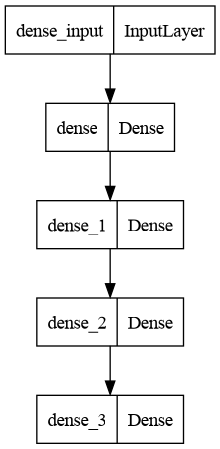

In [111]:
plot_model(deep_model_indicator["BRA"])

In [112]:
from keras_visualizer import visualizer

In [113]:
visualizer(deep_model_indicator["BRA"], file_format='png', view=True)

   ![graph](./graph.png)

## Finding the training set predictions and the test set predictions with DNN

In [114]:
deep_model_indicator

{'BRA': <keras.engine.sequential.Sequential at 0x7f82446ae650>,
 'IND': <keras.engine.sequential.Sequential at 0x7f82440fda50>,
 'CHN': <keras.engine.sequential.Sequential at 0x7f8243736a50>,
 'ZAF': <keras.engine.sequential.Sequential at 0x7f8243736010>,
 'USA': <keras.engine.sequential.Sequential at 0x7f8243735fd0>,
 'GBR': <keras.engine.sequential.Sequential at 0x7f824377e550>,
 'WLD': <keras.engine.sequential.Sequential at 0x7f8243784610>,
 'EUU': <keras.engine.sequential.Sequential at 0x7f8243786c50>}

In [115]:
predictions_indicator_dictionary = dict()

In [116]:
predictions_indicator_dictionary

{}

In [117]:
df_indicator.index

Int64Index([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='year')

In [118]:
for c in regions:
    predictions_indicator_dictionary[c] = pd.DataFrame(index=df_indicator.index, columns=["deepnn"])

In [119]:
predictions_indicator_dictionary

{'BRA':      deepnn
 year       
 1971    NaN
 1972    NaN
 1973    NaN
 1974    NaN
 1975    NaN
 1976    NaN
 1977    NaN
 1978    NaN
 1979    NaN
 1980    NaN
 1981    NaN
 1982    NaN
 1983    NaN
 1984    NaN
 1985    NaN
 1986    NaN
 1987    NaN
 1988    NaN
 1989    NaN
 1990    NaN
 1991    NaN
 1992    NaN
 1993    NaN
 1994    NaN
 1995    NaN
 1996    NaN
 1997    NaN
 1998    NaN
 1999    NaN
 2000    NaN
 2001    NaN
 2002    NaN
 2003    NaN
 2004    NaN
 2005    NaN
 2006    NaN
 2007    NaN
 2008    NaN
 2009    NaN
 2010    NaN
 2011    NaN
 2012    NaN
 2013    NaN
 2014    NaN,
 'IND':      deepnn
 year       
 1971    NaN
 1972    NaN
 1973    NaN
 1974    NaN
 1975    NaN
 1976    NaN
 1977    NaN
 1978    NaN
 1979    NaN
 1980    NaN
 1981    NaN
 1982    NaN
 1983    NaN
 1984    NaN
 1985    NaN
 1986    NaN
 1987    NaN
 1988    NaN
 1989    NaN
 1990    NaN
 1991    NaN
 1992    NaN
 1993    NaN
 1994    NaN
 1995    NaN
 1996    NaN
 1997    NaN
 1998    N

In [120]:
predictions_indicator_dictionary["BRA"]["deepnn"]

year
1971    NaN
1972    NaN
1973    NaN
1974    NaN
1975    NaN
1976    NaN
1977    NaN
1978    NaN
1979    NaN
1980    NaN
1981    NaN
1982    NaN
1983    NaN
1984    NaN
1985    NaN
1986    NaN
1987    NaN
1988    NaN
1989    NaN
1990    NaN
1991    NaN
1992    NaN
1993    NaN
1994    NaN
1995    NaN
1996    NaN
1997    NaN
1998    NaN
1999    NaN
2000    NaN
2001    NaN
2002    NaN
2003    NaN
2004    NaN
2005    NaN
2006    NaN
2007    NaN
2008    NaN
2009    NaN
2010    NaN
2011    NaN
2012    NaN
2013    NaN
2014    NaN
Name: deepnn, dtype: object

In [121]:
predictions_indicator_dictionary["BRA"]["deepnn"].iloc[:train_size]

year
1971    NaN
1972    NaN
1973    NaN
1974    NaN
1975    NaN
1976    NaN
1977    NaN
1978    NaN
1979    NaN
1980    NaN
1981    NaN
1982    NaN
1983    NaN
1984    NaN
1985    NaN
1986    NaN
1987    NaN
1988    NaN
1989    NaN
1990    NaN
1991    NaN
1992    NaN
1993    NaN
1994    NaN
1995    NaN
1996    NaN
1997    NaN
1998    NaN
1999    NaN
2000    NaN
2001    NaN
2002    NaN
2003    NaN
2004    NaN
2005    NaN
Name: deepnn, dtype: object

In [122]:
y_scaler_indicator

{'BRA': StandardScaler(),
 'IND': StandardScaler(),
 'CHN': StandardScaler(),
 'ZAF': StandardScaler(),
 'USA': StandardScaler(),
 'GBR': StandardScaler(),
 'WLD': StandardScaler(),
 'EUU': StandardScaler()}

In [123]:
deep_model_indicator

{'BRA': <keras.engine.sequential.Sequential at 0x7f82446ae650>,
 'IND': <keras.engine.sequential.Sequential at 0x7f82440fda50>,
 'CHN': <keras.engine.sequential.Sequential at 0x7f8243736a50>,
 'ZAF': <keras.engine.sequential.Sequential at 0x7f8243736010>,
 'USA': <keras.engine.sequential.Sequential at 0x7f8243735fd0>,
 'GBR': <keras.engine.sequential.Sequential at 0x7f824377e550>,
 'WLD': <keras.engine.sequential.Sequential at 0x7f8243784610>,
 'EUU': <keras.engine.sequential.Sequential at 0x7f8243786c50>}

In [124]:
X_train_scaled

array([[-1.68325082, -1.67858962, -1.67393496],
       [-1.58423607, -1.58039692, -1.5765595 ],
       [-1.48522131, -1.48215442, -1.47908522],
       [-1.38620656, -1.38386211, -1.38151209],
       [-1.28719181, -1.28551999, -1.28384006],
       [-1.18817705, -1.18712806, -1.18606906],
       [-1.0891623 , -1.08868634, -1.08819906],
       [-0.99014754, -0.9901948 , -0.99022999],
       [-0.89113279, -0.89165346, -0.89216182],
       [-0.79211803, -0.79306231, -0.79399449],
       [-0.69310328, -0.69442136, -0.69572795],
       [-0.59408853, -0.5957306 , -0.59736215],
       [-0.49507377, -0.49699003, -0.49889704],
       [-0.39605902, -0.39819966, -0.40033257],
       [-0.29704426, -0.29935948, -0.30166869],
       [-0.19802951, -0.2004695 , -0.20290536],
       [-0.09901475, -0.10152971, -0.10404251],
       [ 0.        , -0.00254011, -0.0050801 ],
       [ 0.09901475,  0.09649929,  0.09398191],
       [ 0.19802951,  0.1955885 ,  0.19314359],
       [ 0.29704426,  0.29472752,  0.292

In [125]:
deep_model_indicator["BRA"](X_train_scaled).numpy().flatten()

array([-1.0642871 , -1.0650667 , -1.0658686 , -1.0666922 , -1.0675383 ,
       -1.0684062 , -1.0692961 , -1.070208  , -1.069488  , -0.9938593 ,
       -0.5879137 , -0.1722514 ,  0.21124272,  0.3162885 ,  0.38231102,
        0.4409229 ,  0.55464697,  0.930345  ,  1.2082068 ,  1.4419428 ,
        1.4692894 ,  1.4587172 ,  1.4146798 ,  1.3474606 ,  1.0940199 ,
        0.81572616,  0.56362164,  0.36327317,  0.16321099, -0.03599567,
       -0.2361327 , -0.4367813 , -0.63753283, -0.8383877 , -1.0389373 ],
      dtype=float32)

In [126]:
for c in regions:
    predictions_indicator_dictionary[c]["deepnn"].iloc[:train_size] = y_scaler_indicator[c].inverse_transform(deep_model_indicator[c](X_train_scaled).numpy()).flatten()

In [127]:
for c in regions:
    predictions_indicator_dictionary[c]["deepnn"].iloc[train_size:] = y_scaler_indicator[c].inverse_transform(deep_model_indicator[c](X_test_scaled).numpy()).flatten()

In [128]:
predictions_indicator_dictionary

{'BRA':         deepnn
 year          
 1971  6.234464
 1972  6.233662
 1973  6.232837
 1974  6.231989
 1975  6.231119
 1976  6.230226
 1977   6.22931
 1978  6.228372
 1979  6.229113
 1980   6.30692
 1981   6.72456
 1982  7.152196
 1983  7.546738
 1984  7.654809
 1985  7.722734
 1986  7.783034
 1987  7.900034
 1988  8.286555
 1989  8.572421
 1990  8.812891
 1991  8.841025
 1992  8.830149
 1993  8.784842
 1994  8.715687
 1995  8.454945
 1996  8.168634
 1997  7.909267
 1998  7.703148
 1999  7.497322
 2000  7.292377
 2001  7.086475
 2002  6.880046
 2003  6.673512
 2004   6.46687
 2005  6.260544
 2006  6.102916
 2007   5.96962
 2008  5.838397
 2009    5.7135
 2010  5.594778
 2011  5.476504
 2012  5.358172
 2013   5.24169
 2014  5.126589,
 'IND':          deepnn
 year           
 1971  13.845438
 1972  13.721429
 1973   13.59736
 1974  13.473229
 1975  13.349039
 1976   13.22479
 1977  13.100479
 1978   12.97633
 1979  12.853567
 1980  12.731216
 1981  12.609307
 1982  12.488139
 1983  12.3

## Calculating the test prediction errors MAPE for the DNN

In [129]:
# Mean absolute percentage errors on the test set
errors_indicator_test = pd.DataFrame(index=regions, columns=["deepnn"])

In [130]:
errors_indicator_test

,deepnn
BRA,NaN
IND,NaN
CHN,NaN
ZAF,NaN
USA,NaN
GBR,NaN
WLD,NaN
EUU,NaN


In [131]:
errors_indicator_train = errors_indicator_test.copy()

In [132]:
y_test_indicator

,BRA,IND,CHN,ZAF,USA,GBR,WLD,EUU
year,,,,,,,,
2006,6.104512,7.464892,6.495481,6.463258,9.236012,17.852515,9.862386,16.485827
2007,6.021721,6.926106,6.156229,7.648682,9.652542,17.425913,9.471573,14.444750
2008,5.728822,6.596951,5.798459,7.653411,10.089048,19.615369,9.636771,16.024392
2009,6.042296,6.272677,5.573417,7.821341,10.765703,20.262562,9.615836,16.880886
2010,5.346396,6.208523,5.401937,3.412499,10.190292,21.763386,9.204829,17.275371
2011,5.159270,6.173230,5.205434,4.123685,10.230125,19.065864,8.805714,15.673458
2012,4.746116,5.701490,5.302652,5.553239,9.712099,20.131135,8.632350,16.344142
2013,4.508896,5.704307,5.306225,5.591515,10.679440,20.827589,8.804332,17.060117
2014,4.289736,5.490006,5.358338,5.469054,11.011918,19.061397,8.595320,15.459913


In [133]:
y_test_indicator["BRA"]

year
2006    6.104512
2007    6.021721
2008    5.728822
2009    6.042296
2010    5.346396
2011    5.159270
2012    4.746116
2013    4.508896
2014    4.289736
Name: BRA, dtype: float64

In [134]:
from sklearn.metrics import mean_absolute_percentage_error

In [135]:
y_test_indicator["BRA"]

year
2006    6.104512
2007    6.021721
2008    5.728822
2009    6.042296
2010    5.346396
2011    5.159270
2012    4.746116
2013    4.508896
2014    4.289736
Name: BRA, dtype: float64

In [136]:
for c in regions:
    errors_indicator_test.loc[c,'deepnn'] = mean_absolute_percentage_error(y_true=y_test_indicator[c], y_pred=y_scaler_indicator[c].inverse_transform(deep_model_indicator[c](X_test_scaled).numpy()).flatten())

    
errors_indicator_test

,deepnn
BRA,0.075218
IND,0.121626
CHN,0.288256
ZAF,0.235365
USA,0.088251
GBR,0.095515
WLD,0.048349
EUU,0.045105


In [137]:
errors_indicator_test.sort_values(by=['deepnn'], ascending = False)

,deepnn
CHN,0.288256
ZAF,0.235365
IND,0.121626
GBR,0.095515
USA,0.088251
BRA,0.075218
WLD,0.048349
EUU,0.045105


## Calculating the training set prediction errors (MAPE)

In [138]:
deep_model_indicator["BRA"](X_train_scaled)

<tf.Tensor: shape=(35, 1), dtype=float32, numpy=
array([[-1.0642871 ],
       [-1.0650667 ],
       [-1.0658686 ],
       [-1.0666922 ],
       [-1.0675383 ],
       [-1.0684062 ],
       [-1.0692961 ],
       [-1.070208  ],
       [-1.069488  ],
       [-0.9938593 ],
       [-0.5879137 ],
       [-0.1722514 ],
       [ 0.21124272],
       [ 0.3162885 ],
       [ 0.38231102],
       [ 0.4409229 ],
       [ 0.55464697],
       [ 0.930345  ],
       [ 1.2082068 ],
       [ 1.4419428 ],
       [ 1.4692894 ],
       [ 1.4587172 ],
       [ 1.4146798 ],
       [ 1.3474606 ],
       [ 1.0940199 ],
       [ 0.81572616],
       [ 0.56362164],
       [ 0.36327317],
       [ 0.16321099],
       [-0.03599567],
       [-0.2361327 ],
       [-0.4367813 ],
       [-0.63753283],
       [-0.8383877 ],
       [-1.0389373 ]], dtype=float32)>

In [139]:
deep_model_indicator

{'BRA': <keras.engine.sequential.Sequential at 0x7f82446ae650>,
 'IND': <keras.engine.sequential.Sequential at 0x7f82440fda50>,
 'CHN': <keras.engine.sequential.Sequential at 0x7f8243736a50>,
 'ZAF': <keras.engine.sequential.Sequential at 0x7f8243736010>,
 'USA': <keras.engine.sequential.Sequential at 0x7f8243735fd0>,
 'GBR': <keras.engine.sequential.Sequential at 0x7f824377e550>,
 'WLD': <keras.engine.sequential.Sequential at 0x7f8243784610>,
 'EUU': <keras.engine.sequential.Sequential at 0x7f8243786c50>}

In [140]:
y_scaled_indicator

,BRA,IND,CHN,ZAF,USA,GBR,WLD,EUU
year,,,,,,,,
1971,0.098660,1.943996,1.349074,1.979244,2.554467,-1.702053,1.905738,2.136562
1972,0.108556,1.540065,1.304006,1.846045,2.293701,-0.846205,1.842337,2.234206
1973,-0.279414,1.597119,1.219734,1.268729,1.771884,-1.522151,1.542332,2.106170
1974,-0.625255,0.952153,1.133151,1.171832,1.631628,-0.570148,1.328472,1.201376
1975,-0.789204,0.839141,1.157966,0.994563,1.765414,-1.012639,1.406550,1.468180
1976,-0.916480,0.887886,1.067785,0.890415,1.856028,-1.100891,1.393944,1.159926
1977,-0.993661,0.990104,1.076429,0.234426,1.414440,-0.777949,1.177683,0.888317
1978,-1.021571,1.368002,0.897293,1.134190,1.405612,-1.000215,1.166834,1.004032
1979,-0.903519,1.410694,0.914726,0.620315,0.916128,-0.846715,0.960705,0.860273


In [141]:
y_train_indicator

,BRA,IND,CHN,ZAF,USA,GBR,WLD,EUU
year,,,,,,,,
1971,7.044025,15.087564,21.596575,7.925393,19.061400,17.230274,18.615556,21.950546
1972,7.056473,14.035274,21.329853,7.742371,18.390586,18.141505,18.432397,22.129084
1973,6.568496,14.183907,20.831115,6.949115,17.048219,17.421817,17.565715,21.894976
1974,6.133508,12.503688,20.318703,6.815974,16.687413,18.435426,16.947899,20.240601
1975,5.927298,12.209276,20.465564,6.572400,17.031575,17.964301,17.173455,20.728440
1976,5.767214,12.336263,19.931858,6.429296,17.264680,17.870337,17.137039,20.164812
1977,5.670138,12.602554,19.983016,5.527939,16.128702,18.214177,16.512286,19.668188
1978,5.635035,13.587028,18.922859,6.764253,16.105992,17.977528,16.480944,19.879768
1979,5.783516,13.698245,19.026029,6.058166,14.846802,18.140961,15.885459,19.616910


In [142]:
for c in regions:
    errors_indicator_train.loc[c,'deepnn']    =  mean_absolute_percentage_error(y_true=y_train_indicator[c], y_pred =y_scaler_indicator[c].inverse_transform(deep_model_indicator[c](X_train_scaled).numpy()).flatten())

In [143]:
errors_indicator_train

,deepnn
BRA,0.035363
IND,0.026856
CHN,0.021025
ZAF,0.091434
USA,0.021522
GBR,0.011405
WLD,0.011179
EUU,0.015387


In [144]:
errors_indicator_train.apply(lambda x: [format(z, '.2%') for z in x])

,deepnn
BRA,3.54%
IND,2.69%
CHN,2.10%
ZAF,9.14%
USA,2.15%
GBR,1.14%
WLD,1.12%
EUU,1.54%


In [145]:
errors_indicator_test.apply(lambda x: [format(z, '.2%') for z in x])

,deepnn
BRA,7.52%
IND,12.16%
CHN,28.83%
ZAF,23.54%
USA,8.83%
GBR,9.55%
WLD,4.83%
EUU,4.51%


## Checking to see if the model has overfitted

a) to check if a model is overfitting we need to compare the training and test errors.  

b) we do testMAPE - trainMAPE. We dont take absolute value; If you take the absolute values you can't tell which error is larger (training or test).

c) the testMAPE itself , i.e. withough comparing it with the trainingMAPE, is a proxy of the error of the forecasts.
So if the testMAPE is high then we expect the forecast error to be high as well.
How high should the testMAPE be in order for us to say "ok this is not a model to use for forecasts"? Well, there 
is no predefined threshold, it's subjective and it depends on how the model is going to be used

In [146]:
errors_indicator_test

,deepnn
BRA,0.075218
IND,0.121626
CHN,0.288256
ZAF,0.235365
USA,0.088251
GBR,0.095515
WLD,0.048349
EUU,0.045105


In [147]:
errors_indicator_train

,deepnn
BRA,0.035363
IND,0.026856
CHN,0.021025
ZAF,0.091434
USA,0.021522
GBR,0.011405
WLD,0.011179
EUU,0.015387


In [148]:
does_it_overfit = errors_indicator_test - errors_indicator_train

In [149]:
does_it_overfit

,deepnn
BRA,0.039855
IND,0.09477
CHN,0.267231
ZAF,0.143931
USA,0.06673
GBR,0.08411
WLD,0.03717
EUU,0.029717


In [150]:
does_it_overfit.apply(lambda x: [format(z, '.2%') for z in x])

,deepnn
BRA,3.99%
IND,9.48%
CHN,26.72%
ZAF,14.39%
USA,6.67%
GBR,8.41%
WLD,3.72%
EUU,2.97%


In [151]:
print( does_it_overfit.mean(axis=0) * 100 )

print( does_it_overfit.abs().mean() * 100 )

print( does_it_overfit.std() * 100)

deepnn    9.543933
dtype: float64
deepnn    9.543933
dtype: float64
deepnn    7.894057
dtype: float64


In [152]:
for x in does_it_overfit.index:
    for y in does_it_overfit.columns:
        if does_it_overfit.loc[x,y] >= 0.1:
            print(f"OVERFITTING:  index={x}, col={y} : {does_it_overfit.loc[x,y]}")
        if does_it_overfit.loc[x,y] < 0:
            print(f"***NEGATIVE!  index={x}, col={y} : {does_it_overfit.loc[x,y]}")

OVERFITTING:  index=CHN, col=deepnn : 0.26723144700962154
OVERFITTING:  index=ZAF, col=deepnn : 0.14393106080690443


There is no predefined threshold. 

If the test MAPE is at least 10% higher than the train MAPE, then we can conclude that the model is overfitting.

One indication of overfitting is when the train MAPE is small and the test mape is very high . 
This means that the model learnt very well the train set but does really do well with unseen data.  

The negative value means that the training MAPE is higher than the testMAPE. It happens sometimes. Does not mean it is wrong. in those cases when the model shows a train MAPE that is higher than the test MAPE, this seems to be a good indication of no overfitting .
It seems to mean that the fitting was done well. So if the fitting is done well, sometimes the model can have a test MAPE 5% more or 5% less than the train mape.  

For the MAPE it's more common to report the difference (test MAPE - train MAPE) while for the MSE, RMSE, MAE etc. it's more common to report the ratio (e.g. test RMSE / train RMSE).

One reason for overfitting in this basic example:

1) small number of datapoints. So we have 8 country-sets (Brazil, etc) each having 44 datapoints. 
However, we dont see overfitting everywhere.So the number of datapoints by itself does not guarantee overfitting.
It's easier to overfit on a small dataset, but the small number of samples is not the only reason. 

Eg one dataset (for Brazil) has difference train-test MAPE of some % and another ( world) has such difference very small , both for LR ! So the size of the training set (which is 35) doesnot seem to matter.  

So those that are over 10% must be rejected ie we wouldnt use them to make forecasts.
 in this case we should try to improve the model or try a different model.


What is the primary reason for overfitting is how closely the test set follows the training set. So if the training set is wavy , and the test set is wavy in the same way , then the train-test mape are close.

So if the behavior of the time series on the test set is different from the one on the training set, then the model will not perform well on the test set. 




very large datasets will not be affected by hyperparameters or how close the test set is to the training set patterns.

Ie the larger the training set the lower the effect of hyperparameters will be.Another reason for overfitting could be the selection of hyperparameters. So under different hyperparameters the quality of the fit can improve.




## Sensitivity analysis on test-MAPE

In [156]:
deep_model_sensitivity = dict()
predictions_sens = dict()
errors_indicator_sensitivity = dict()

In [157]:
list(range(1, 3))

[1, 2]

In [158]:
y_train_scaled_indicator

,BRA,IND,CHN,ZAF,USA,GBR,WLD,EUU
year,,,,,,,,
1971,-0.277394,2.073310,1.227154,2.293018,2.342311,-1.766890,1.925902,2.012746
1972,-0.265295,1.541486,1.171953,2.149110,2.079374,-0.808583,1.847430,2.117570
1973,-0.739608,1.616604,1.068733,1.525382,1.553211,-1.565451,1.476107,1.980119
1974,-1.162415,0.767426,0.962682,1.420695,1.411787,-0.499478,1.211408,1.008792
1975,-1.362852,0.618631,0.993077,1.229176,1.546687,-0.994942,1.308046,1.295215
1976,-1.518453,0.682811,0.882620,1.116655,1.638056,-1.093760,1.292444,0.964294
1977,-1.612811,0.817393,0.893208,0.407929,1.192791,-0.732156,1.024773,0.672713
1978,-1.646932,1.314943,0.673795,1.380027,1.183890,-0.981031,1.011345,0.796937
1979,-1.502608,1.371152,0.695147,0.824840,0.690329,-0.809155,0.756215,0.642607


In [159]:
df_indicator

,BRA,CHN,EUU,IND,ZAF,GBR,USA,WLD
year,,,,,,,,
1971,7.044025,21.596575,21.950546,15.087564,7.925393,17.230274,19.061400,18.615556
1972,7.056473,21.329853,22.129084,14.035274,7.742371,18.141505,18.390586,18.432397
1973,6.568496,20.831115,21.894976,14.183907,6.949115,17.421817,17.048219,17.565715
1974,6.133508,20.318703,20.240601,12.503688,6.815974,18.435426,16.687413,16.947899
1975,5.927298,20.465564,20.728440,12.209276,6.572400,17.964301,17.031575,17.173455
1976,5.767214,19.931858,20.164812,12.336263,6.429296,17.870337,17.264680,17.137039
1977,5.670138,19.983016,19.668188,12.602554,5.527939,18.214177,16.128702,16.512286
1978,5.635035,18.922859,19.879768,13.587028,6.764253,17.977528,16.105992,16.480944
1979,5.783516,19.026029,19.616910,13.698245,6.058166,18.140961,14.846802,15.885459


In [160]:
y_scaler_indicator

{'BRA': StandardScaler(),
 'IND': StandardScaler(),
 'CHN': StandardScaler(),
 'ZAF': StandardScaler(),
 'USA': StandardScaler(),
 'GBR': StandardScaler(),
 'WLD': StandardScaler(),
 'EUU': StandardScaler()}

In [161]:
list(range(1,3))

[1, 2]

In [162]:
regions

['BRA', 'IND', 'CHN', 'ZAF', 'USA', 'GBR', 'WLD', 'EUU']

In [163]:
list(range(50, 150, 50))

[50, 100]

In [164]:
tf.random.set_seed(42)

for deg in range(1,3): # 1,2   (previously was degree=3)
    poly = PolynomialFeatures(degree= deg, include_bias=False)  # reminder1
    X_dnn = poly.fit_transform(t)    # reminder2
    X_train_dnn = X_dnn[: train_size, : ]      # reminder3
    X_test_dnn = X_dnn[train_size: , : ] 
    x_scaler_dnn = StandardScaler().fit(X_train_dnn)  # reminder4
    X_train_scaled_dnn = x_scaler_dnn.transform(X_train_dnn)  
    X_test_scaled_dnn = x_scaler_dnn.transform(X_test_dnn)
#     x_scaler_all_dnn = StandardScaler().fit(X_dnn)   
#     X_scaled_dnn = x_scaler_all_dnn.transform(X_dnn)   

    for c in regions:
        print("--------------")
        for nepo in range(50,150,50):   # 50, 100
            for un in range(50,150,50):
    
                deep_model_sensitivity[(deg,un,nepo,c)] = Sequential([     # reminder5
                    Dense(units=un, activation='relu'),
                    Dense(units=un, activation='relu'),
                    Dense(units=un, activation='relu'),
                    Dense(units=1)
                ])
        
                deep_model_sensitivity[deg,un,nepo,c].compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error') # reminder6
                deep_model_sensitivity[deg,un,nepo,c].fit(X_train_scaled_dnn, y_train_scaled_indicator[c], epochs=nepo, batch_size=8, verbose=0) # reminder7
                predictions_sens[deg,un,nepo,c] = pd.DataFrame(index= df_indicator.index, columns=['deepnn'])
                predictions_sens[deg,un,nepo,c].iloc[:train_size] = y_scaler_indicator[c].inverse_transform(deep_model_sensitivity[deg,un,nepo,c](X_train_scaled_dnn).numpy())
                predictions_sens[deg,un,nepo,c].iloc[train_size:] = y_scaler_indicator[c].inverse_transform(deep_model_sensitivity[deg,un,nepo,c](X_test_scaled_dnn).numpy())
                
                errors_indicator_sensitivity[deg,un,nepo,c] =  mean_absolute_percentage_error(y_true=y_test_indicator[c], y_pred= y_scaler_indicator[c].inverse_transform(deep_model_sensitivity[deg,un,nepo,c](X_test_scaled_dnn).numpy()).flatten()) # reminder8

                print(f"Country = {c}, test-mape deepnn: {format(errors_indicator_sensitivity[deg,un,nepo,c], '.1%')} , deg={deg}, un={un}, nepo={nepo},  ")

--------------
Country = BRA, test-mape deepnn: 9.4% , deg=1, un=50, nepo=50,  
Country = BRA, test-mape deepnn: 7.3% , deg=1, un=100, nepo=50,  
Country = BRA, test-mape deepnn: 5.5% , deg=1, un=50, nepo=100,  
Country = BRA, test-mape deepnn: 6.2% , deg=1, un=100, nepo=100,  
--------------
Country = IND, test-mape deepnn: 14.5% , deg=1, un=50, nepo=50,  
Country = IND, test-mape deepnn: 11.3% , deg=1, un=100, nepo=50,  
Country = IND, test-mape deepnn: 11.5% , deg=1, un=50, nepo=100,  
Country = IND, test-mape deepnn: 13.1% , deg=1, un=100, nepo=100,  
--------------
Country = CHN, test-mape deepnn: 34.8% , deg=1, un=50, nepo=50,  
Country = CHN, test-mape deepnn: 30.6% , deg=1, un=100, nepo=50,  
Country = CHN, test-mape deepnn: 25.6% , deg=1, un=50, nepo=100,  
Country = CHN, test-mape deepnn: 26.2% , deg=1, un=100, nepo=100,  
--------------
Country = ZAF, test-mape deepnn: 26.3% , deg=1, un=50, nepo=50,  
Country = ZAF, test-mape deepnn: 26.0% , deg=1, un=100, nepo=50,  
Country